In [1]:
import tensorflow as tf

In [2]:
print('TensorFlow version: ', tf.__version__)

TensorFlow version:  1.3.0


In [3]:
import csv

In [10]:
import keras

Using Theano backend.


In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
a = tf.constant(6, name='constant_a')
b = tf.constant(3, name='constant_b')
c = tf.constant(10, name='constant_c')
d = tf.constant(5, name='constant_d')

In [4]:
#a,b,c and d are the tensors flowing through the graph
mul = tf.multiply(a,b, name="mul")
#mul is a node which specifies the multiply operation on 'a' and 'b'
div = tf.div(c,d, name="div")
#division operation which divides c by d and have the name "div"
#tf.add_n sums up the element in an array
addn = tf.add_n([mul,div], name="addn")

In [5]:
sess = tf.Session()
sess.run(addn)

20

In [15]:
writer = tf.summary.FileWriter('./exampleTensorflow1', sess.graph)


In [16]:
writer.close()
sess.close()

In [ ]:
#https://towardsdatascience.com/understanding-fundamentals-of-tensorflow-program-and-why-it-is-necessary-94cf5b60e255

## Interactive Session

In [1]:
import tensorflow as tf

In [6]:
from tensorflow.python.platform import gfile

In [7]:
with tf.Session() as sess:
    model_filename ='PATH_TO_PB.pb'
    with gfile.FastGFile(model_filename, 'rb') as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())
        g_in = tf.import_graph_def(graph_def)

NotFoundError: NewRandomAccessFile failed to Create/Open: PATH_TO_PB.pb : The system cannot find the file specified.


### targeted for using IPython and Jupyter Notebooks that allows you to add things and use .eval() instead of Sessions.run 

In [11]:
sess = tf.InteractiveSession()
a = tf.constant(1)
b = tf.constant(5)
c = a + b
# instead of sess.run(c)
c.eval()

6

### Placeholders in TensorFlow are similar to variables
### dont have to provide an initial value and you can specify it at runtime with feed_dict argument inside Session.run 

In [4]:
#setup placeholder using tf.placeholder
x = tf.placeholder(tf.int32, shape=[3],name='x')

In [5]:
y = tf.placeholder(tf.int32, shape=[3],name='y')

In [6]:
sum_x = tf.reduce_sum(x,name="sum_x")
prod_y = tf.reduce_prod(y,name="prod_y")

In [8]:
final_mean = tf.reduce_mean([sum_x, prod_y], name="final_mean")
sess = tf.Session()
print ("sum(x): ", sess.run(sum_x, feed_dict={x: [100,200,300]}))
print ("prod(y): ", sess.run(prod_y, feed_dict={y: [1,2,3]}))
writer = tf.summary.FileWriter('./tensorflow_example',sess.graph)

sum(x):  600
prod(y):  6


## Constants & Variables

###  when you declare some constant, its value can't be changed in the future (also the initialization should be with a value, not with operation)

In [12]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,6])


In [4]:
# Multiply
result = tf.multiply(x1, x2)

# Print the result
print(result)

Tensor("Mul:0", shape=(4,), dtype=int32)


In [5]:
# Multiply
result = tf.multiply(x1, x2)

# Intialize the Session
sess = tf.Session()

# Print the result
print(sess.run(result))

# Close the session
sess.close()

[ 5 12 21 24]


### when you declare a Variable, you can change its value in the future 

In [3]:
x = tf.constant(35, name='x')
y = tf.Variable(x + 8, name='y')

model = tf.global_variables_initializer() 

with tf.Session() as session:
    session.run(model)
    print(session.run(y))

43


In [1]:
import tensorflow as tf

In [8]:
import numpy as np

In [9]:
import matplotlib.pyplot as plt

In [8]:
import pandas as pd

## K-Means Clustering

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

### Define scatterplot

In [3]:
def ScatterPlot(X, Y, assignments=None, centers=None):
  if assignments is None:
    assignments = [0] * len(X)
  fig = plt.figure(figsize=(14,8))
  cmap = ListedColormap(['red', 'green', 'blue', 'magenta'])
  plt.scatter(X, Y, c=assignments, cmap=cmap)
  if centers is not None:
    plt.scatter(centers[:, 0], centers[:, 1], c=range(len(centers)), 
                marker='+', s=400, cmap=cmap)  
  plt.xlabel('Height (in)')
  plt.ylabel('Weight (lbs)')
  plt.show()

### Read in and visualize the data

In [16]:
hw_frame = pd.read_csv('hw-data.txt', delim_whitespace=True,header=None, names=['Index', 'Height', 'Weight'])
hw_frame.drop('Index', 1, inplace=True)


In [17]:
hw_frame.head(5)

Height  Weight
0   65.78  112.99
1   71.52  136.49
2   69.40  153.03
3   68.22  142.34
4   67.79  144.30

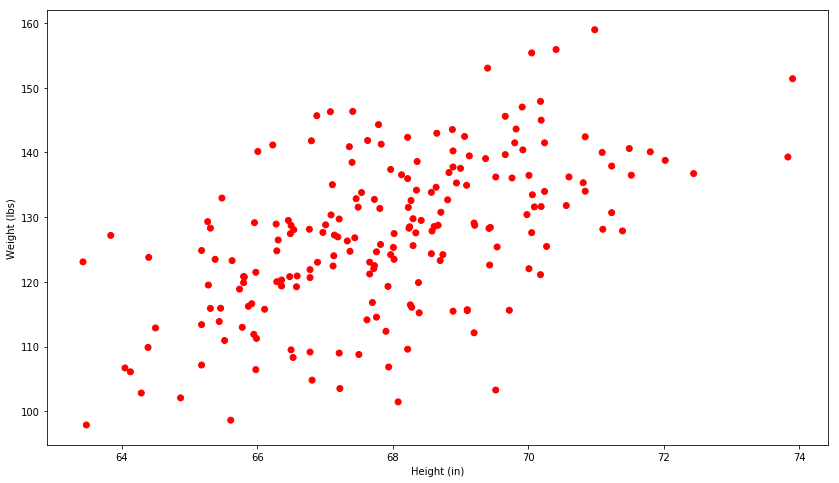

In [18]:
ScatterPlot(hw_frame.Height, hw_frame.Weight)

In [19]:
def input_fn():
  return tf.constant(hw_frame.as_matrix(), tf.float32, hw_frame.shape), None

## turn data frame into tf constant

### access k-means function of tensorflow

In [20]:
tf.logging.set_verbosity(tf.logging.ERROR)
kmeans = tf.contrib.learn.KMeansClustering(num_clusters=4, relative_tolerance=0.0001)
_ = kmeans.fit(input_fn=input_fn)


C:\Users\Minerva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [21]:
clusters = kmeans.clusters()
assignments = list(kmeans.predict_cluster_idx(input_fn=input_fn))

C:\Users\Minerva\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


### visualize the results

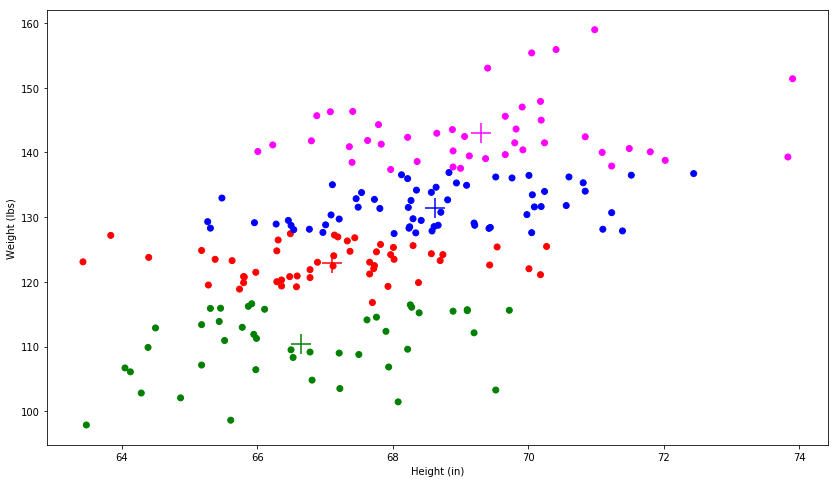

In [22]:
ScatterPlot(hw_frame.Height, hw_frame.Weight, assignments, clusters)

In [2]:
a = tf.add(1, 2, name="Add_these_numbers") # Addition
b = tf.multiply(a, 3) # Multiplication
c = tf.add(4, 5, name="And_These_ones") # Again addition
d = tf.multiply(c, 6, name="Multiply_these_numbers") #Multiplication
e = tf.multiply(4, 5, name="B_add") #Multiplication
f = tf.div(c, 6, name="B_mul") # Division
g = tf.add(b, d) # Addition
h = tf.multiply(g, f) #multi

with tf.Session() as sess:
    writer = tf.summary.FileWriter("/tmp2/output_graph", sess.graph)
    print(sess.run(h))
    writer.close()

63


## Scalars (0D tensors)
### tensor with one number is a 0D scalar

In [5]:
import numpy as np

In [6]:
x=np.array(12)
x

array(12)

## Computational Graph

### A computational graph is a series of TensorFlow operations arranged into a graph of node
###  Each node takes zero or more tensors as inputs and produces a tensor as an output.
### One type of node is a constant. Like all TensorFlow constants, it takes no inputs, and it outputs a value it stores internally.


In [12]:
node1 = tf.constant(3.0, dtype=tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
print(node1, node2)

Tensor("Const_8:0", shape=(), dtype=float32) Tensor("Const_9:0", shape=(), dtype=float32)


#### in order to see the values

In [13]:
sess = tf.Session()
print(sess.run([node1, node2]))

[3.0, 4.0]


In [14]:
from __future__ import print_function
node3 = tf.add(node1, node2)
print("node3:", node3)
print("sess.run(node3):", sess.run(node3))

node3: Tensor("Add:0", shape=(), dtype=float32)
sess.run(node3): 7.0


In [8]:
# creates nodes in a graph
# "construction phase"
x1 = tf.constant(5)
x2 = tf.constant(6)

In [10]:
result = tf.multiply(x1, x2)

# Initialize Session and run `result`
with tf.Session() as sess:
  output = sess.run(result)
  print(output)

30


In [11]:
sess = tf.Session()
a = tf.constant(10)
b = tf.constant(32)
print(sess.run(a+b))

42


In [7]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Initialize Session and run `result`
with tf.Session() as sess:
  output = sess.run(result)
  print(output)

[ 5 12 21 32]


In [1]:
import ee

In [3]:
ee.Initialize()

In [4]:
image1 = ee.Image('srtm90_v4')

In [5]:
path = image1.getDownloadUrl({
    'scale': 30,
    'crs': 'EPSG:4326',
    'region': '[[-120, 35], [-119, 35], [-119, 34], [-120, 34]]'
})

In [7]:
print (path)

https://earthengine.googleapis.com/api/download?docid=94418924d585b3249ad97df4333b07a8&token=078155f0c65186b17b94f9541d32051e


In [ ]:
#https://anujdutt9.github.io/Jupyter-Notebooks/TF-LinearRegressor-Estimator.html 
#https://github.com/christophebourguignat/notebooks/blob/master/TensorFlow%20Tutorial.ipynb

## OLS Regression
### One response variable and one predictor variable

In [1]:
import numpy as np
import matplotlib.pyplot as plot

### create dummy data

In [5]:
from sklearn import datasets as skds

In [6]:
X,y = skds.make_regression(n_samples=200,n_features=1,n_informative=1,n_targets=1,noise=20.0)
##200 values each for the target and predictor variable

#### Reshape numpy array to have 2 dimesions

In [7]:
if(y.ndim==1):
    y=y.reshape(len(y),1)

#### Plotting

In [ ]:
#import matplotlib.pyplot as plot

In [9]:
plot.figure(figsize=(15,9))

<Figure size 1080x648 with 0 Axes>

<Figure size 1080x648 with 0 Axes>

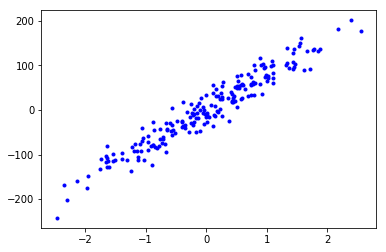

In [10]:
plot.plot(X,y,'.b')

### Split data into training & testing dataset

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=123)
##set aside 30% dataset for testing

## Defining inputs, parameters and other variables

In [19]:
num_outputs=y_train.shape[1] #one response variable
num_inputs=X_train.shape[1] #one predictor

#### Use placeholders

In [21]:
import tensorflow as tf

#### define eqn:  y=W*x + b

In [22]:
x_tensor=tf.placeholder(dtype=tf.float32, shape=[None,num_inputs],name="x")
## tf placeholder to accomodate the input

In [23]:
y_tensor=tf.placeholder(dtype=tf.float32, shape=[None,num_outputs],name="y")##response variable

In [26]:
w=tf.Variable(tf.zeros([num_inputs,num_outputs]),dtype=tf.float32,name="w")

In [27]:
b=tf.Variable(tf.zeros([num_outputs]),dtype=tf.float32,name="b")

In [28]:
model=tf.matmul(x_tensor,w)+b #y=W*x + b 

#### defining the loss function
#### mean squared error/residuals 
#### residual = (Y)predict -(Y)actual ; residual= model-y_tensor

In [30]:
loss = tf.reduce_mean(tf.square(model-y_tensor))#MSE 


#### Compute MSE & R2

In [35]:
mse = tf.reduce_mean(tf.square(model-y_tensor))#MSE 

In [34]:
y_mean=tf.reduce_mean(y_tensor)

In [38]:
total_error=tf.reduce_sum(tf.square(y_tensor-y_mean))

In [39]:
unexplained_error=tf.reduce_sum(tf.square(y_tensor-model))

In [40]:
rsq=1-tf.div(unexplained_error,total_error)

### define optimizer function

In [41]:
learning_rate=0.001

In [43]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
##gradient descent is an algorithm that minimizes functions
## learning rate is the step we take per iteration

### Train the model

In [52]:
num_epochs=1800 ##number of iterations to run the training for


In [53]:
##w_hat and b_hat: estimates of w and b
w_hat=0
b_hat=0

In [54]:
loss_epochs=np.empty(shape=[num_epochs],dtype=float)
mse_epochs=np.empty(shape=[num_epochs],dtype=float)
rs_epochs=np.empty(shape=[num_epochs],dtype=float)

In [55]:
mse_score=0
rsq_score=0
#initial values

In [57]:
with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())#run optimizer/loop on training data
    for epoch in range(num_epochs):
        feed_dict = {x_tensor: X_train, y_tensor: y_train}
        loss_val, _ = tfs.run([loss, optimizer], feed_dict=feed_dict)
        loss_epochs[epoch] = loss_val #calculate and store error

        feed_dict = {x_tensor: X_test, y_tensor: y_test}
        mse_score, rsq_score = tfs.run([mse, rsq], feed_dict=feed_dict)
        mse_epochs[epoch] = mse_score
        rs_epochs[epoch] = rsq_score

    w_hat, b_hat = tfs.run([w, b]) #final values of w and b obtained after all iterations
    w_hat = w_hat.reshape(1)

print('model : Y = {0:.8f} X + {1:.8f}'.format(w_hat[0], b_hat[0]))
print('For test data : MSE = {0:.8f}, R2 = {1:.8f} '.format(
    mse_score, rsq_score))

model : Y = 76.28392792 X + 0.02938078
For test data : MSE = 428.85806274, R2 = 0.93040180 


## Visualization

In [58]:
import numpy as np
import matplotlib.pyplot as plt

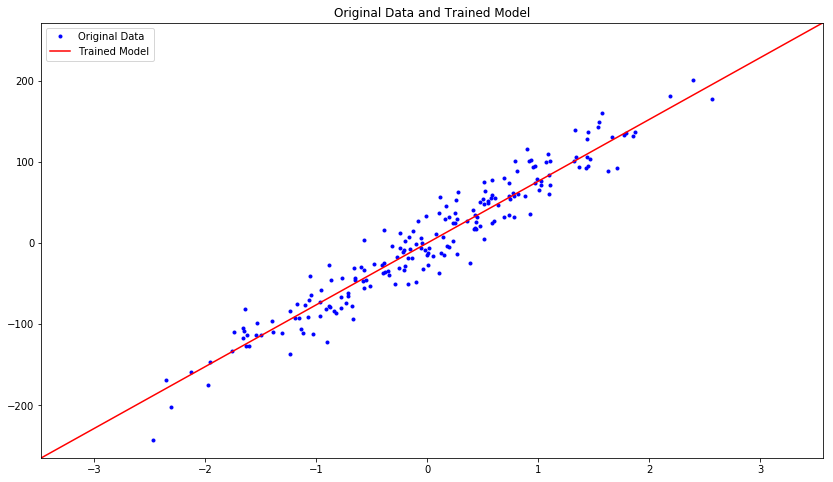

In [60]:
plt.figure(figsize=(14, 8))
plt.title('Original Data and Trained Model')

x_plot = [np.min(X) - 1, np.max(X) + 1]#range of X values
y_plot = w_hat * x_plot + b_hat #w_hat and b_hat predicted before 
plt.axis([x_plot[0], x_plot[1], y_plot[0], y_plot[1]])
plt.plot(X, y, 'b.', label='Original Data')
plt.plot(x_plot, y_plot, 'r-', label='Trained Model')
plt.legend()
plt.show()



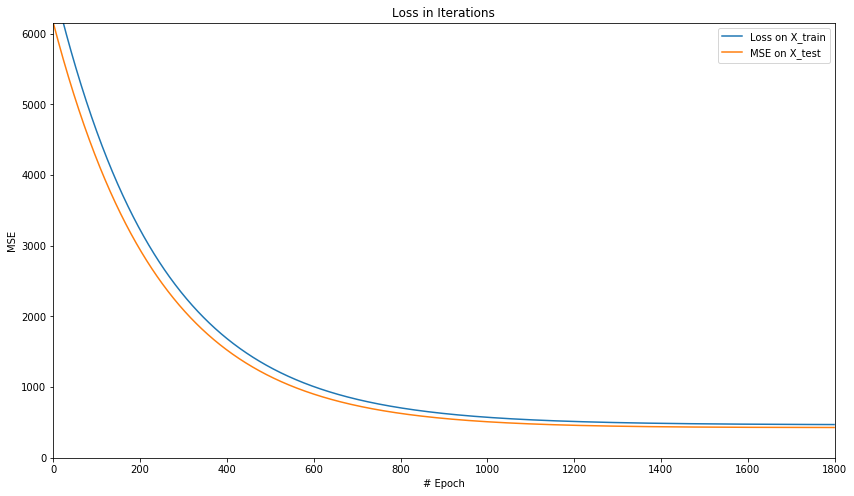

In [61]:
plt.figure(figsize=(14, 8))

plt.axis([0, num_epochs, 0, np.max(loss_epochs)])
plt.plot(loss_epochs, label='Loss on X_train')
plt.title('Loss in Iterations')
plt.xlabel('# Epoch')
plt.ylabel('MSE')

plt.axis([0, num_epochs, 0, np.max(mse_epochs)])
plt.plot(mse_epochs, label='MSE on X_test')
plt.xlabel('# Epoch')
plt.ylabel('MSE')
plt.legend()

plt.show()



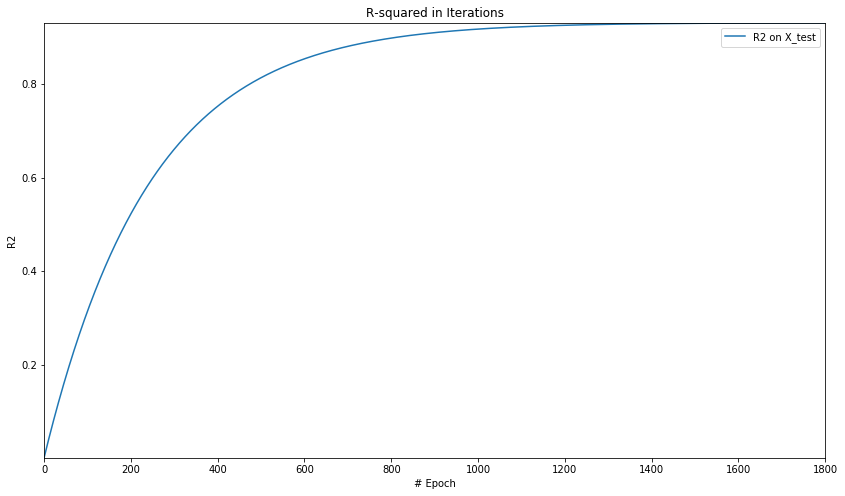

In [62]:
plt.figure(figsize=(14, 8))

plt.axis([0, num_epochs, np.min(rs_epochs), np.max(rs_epochs)])
plt.title('R-squared in Iterations')
plt.plot(rs_epochs, label='R2 on X_test')
plt.xlabel('# Epoch')
plt.ylabel('R2')
plt.legend()

plt.show()

## Multiple Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets as skds

In [3]:
from sklearn import datasets 

In [4]:
from sklearn.datasets import load_boston

In [5]:
import tensorflow as tf

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
boston=load_boston()
print(boston.DESCR)

X=boston.data.astype(np.float32)
y=boston.target.astype(np.float32)
if (y.ndim == 1):
    y = y.reshape(-1,1)
X = StandardScaler().fit_transform(X)
##Standardize features by removing the mean and scaling to unit variance

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=123)
print(X_train.shape)

(354, 13)


In [9]:
num_outputs = y_train.shape[1]
num_inputs = X_train.shape[1]

x_tensor = tf.placeholder(dtype=tf.float32, shape=[None, num_inputs], name='x')
y_tensor = tf.placeholder(
    dtype=tf.float32, shape=[None, num_outputs], name='y')

w = tf.Variable(
    tf.zeros([num_inputs, num_outputs]), dtype=tf.float32, name='w')
b = tf.Variable(tf.zeros([num_outputs]), dtype=tf.float32, name='b')

model = tf.matmul(x_tensor, w) + b

#### define loss, MSE & R2

In [10]:
loss = tf.reduce_mean(tf.square(model - y_tensor))
mse = tf.reduce_mean(tf.square(model - y_tensor))
y_mean = tf.reduce_mean(y_tensor)
total_error = tf.reduce_sum(tf.square(y_tensor - y_mean))
unexplained_error = tf.reduce_sum(tf.square(y_tensor - model))
rs = 1 - tf.div(unexplained_error, total_error)

In [11]:
learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [ ]:
num_epochs = 1500
loss_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
mse_epochs = np.empty(shape=[num_epochs], dtype=np.float32)
rs_epochs = np.empty(shape=[num_epochs], dtype=np.float32)

mse_score = 0.0
rs_score = 0.0

with tf.Session() as tfs:
    tfs.run(tf.global_variables_initializer())
    for epoch in range(num_epochs):
        feed_dict = {x_tensor: X_train, y_tensor: y_train}
        loss_val, _ = tfs.run([loss, optimizer], feed_dict)
        loss_epochs[epoch] = loss_val

        feed_dict = {x_tensor: X_test, y_tensor: y_test}
        mse_score, rs_score = tfs.run([mse, rs], feed_dict)
        mse_epochs[epoch] = mse_score
        rs_epochs[epoch] = rs_score

print('For test data : MSE = {0:.8f}, R2 = {1:.8f} '.format(
    mse_score, rs_score))

## Multiple Regression- Machine Learning Approach

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.datasets import load_boston 
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split

import tensorflow as tf
import matplotlib.pyplot as plt


In [13]:
boston = load_boston()
# The True passed to load_boston() lets it know that we want features and prices in separate numpy arrays.
print("Shape of design (feature) matrix : \n ", boston.data.shape)
print("List of features : \n ", boston.feature_names)

bos = pd.DataFrame(boston.data)
bos.head()

Shape of design (feature) matrix : 
  (506, 13)
List of features : 
  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [14]:
bos.columns = boston.feature_names ##predictors
bos['PRICE'] = boston.target #response variable 
print("Simples statistics : \n ", bos.describe())


Simples statistics : 
               CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std

### Normlaization- helps improve performance of the regression model

In [15]:
# Get the data 
total_features, total_prices = load_boston(True) 

# Keep 300 samples for training 
train_features = scale(total_features[:300]) 
train_prices = total_prices[:300] #y
 
# Keep 100 samples for validation 
valid_features = scale(total_features[300:400]) 
valid_prices = total_prices[300:400] 
 
# Keep remaining samples as test set 
test_features = scale(total_features[400:]) 
test_prices = total_prices[400:] 

In [17]:
nb_obs = total_features.shape[0]
print("There is {} observations in our dataset ".format(nb_obs))

nb_feature = total_features.shape[1]
print("There is {} features in our dataset ".format(nb_feature))

There is 506 observations in our dataset 
There is 13 features in our dataset 


### Create tensors

In [18]:
# Set model weights - with random initialization
## Weights and bias (b)
##tf.truncated_normal() specified as an initial value, 
##which generates a regularised set of numbers from the normal probability distribution
W = tf.Variable(tf.truncated_normal([nb_feature, 1], 
                                    mean=0.0, 
                                    stddev=1.0, 
                                    dtype=tf.float64), 
                name="weight") 
# Set model biais - initialized to 0
b = tf.Variable(tf.zeros(1, dtype = tf.float64), name="bias") 

In [19]:
# tf Graph Input 
X = tf.placeholder("float") 
Y = tf.placeholder("float") 

### Regression model
### Ypred = wX + b

In [20]:
def linear_reg(x,y):
    # Define your equation Ypred = X * W + b
    Ypred = tf.add(b,tf.matmul(x,W))

    # Define your loss function
    error = tf.reduce_mean(tf.square(y - Ypred))
    
    # Return values 
    return([Ypred,error])

y, cost = linear_reg(train_features, train_prices)##input X and Y

### Specify Gradient Descent

In [21]:
# Define your parameter : 
learning_rate = 0.01
epochs = 200
cost_history = [[], []]

# Use gradient descent to minimize loss
optim = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)

In [22]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

### Run model

Cost =  711.6938164100554
Cost =  90.7143838811763


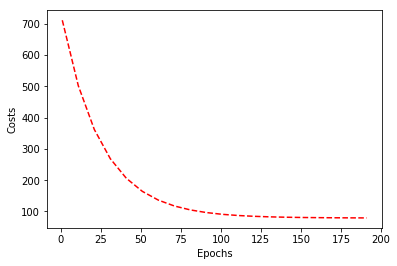

Train error = 79.15145782395662
Validation error = 100.80136577892554


In [23]:
with tf.Session() as sess:
    sess.run(init)
    for i in list(range(epochs)):
        sess.run(optim) # Execute the gradient descent, according our learning_rate and our cost function
        
        # For each 10 epochs, save costs values - we can plot it later  
        if i % 10 == 0.: 
            cost_history[0].append(i+1) 
            cost_history[1].append(sess.run(cost)) 
        if i % 100 == 0: 
            print("Cost = ", sess.run(cost)) 
        
    # Plot costs values
    plt.plot(cost_history[0], cost_history[1], 'r--')
    plt.ylabel('Costs')
    plt.xlabel('Epochs')
    plt.show() 
    
    train_cost = linear_reg(train_features, train_prices)[1]
    print('Train error =', sess.run(train_cost))
    valid_cost = linear_reg(valid_features, valid_prices)[1]
    print('Validation error =', sess.run(valid_cost))

In [ ]:
##https://www.kaggle.com/tabora/titanic-tensorflow-canned-estimators-beginners

In [ ]:
##https://www.altoros.com/blog/using-logistic-and-softmax-regression-with-tensorflow/
#https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/random_forest.py
##https://hackernoon.com/tensorflow-in-a-nutshell-part-three-all-the-models-be1465993930

## Autoencoder (2 classes)

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np

In [2]:
from tensorflow.contrib import layers
from tensorflow.contrib.learn.python.learn.estimators import linear
from tensorflow.contrib.linear_optimizer.python import sdca_optimizer


In [14]:
df = pd.read_csv("creditcard.csv")
df.head(n=6)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   
5  0.260314 -0.568671  ...   -0.208254 -0.559825 -0.026398 -0.371427   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  
5 -0.232794  0.105915  0.253844  0.081080    3.67      0  

[6 rows x 31 columns]

In [15]:
##Explore data

fraud_indices = df[df.Class == 1].index
number_records_fraud = len(fraud_indices)

normal_indices = df[df.Class == 0].index
number_records_normal = len(normal_indices)

print("Normal transactions: ", number_records_normal)
print("Fraud transactions: ", number_records_fraud)

Normal transactions:  284315
Fraud transactions:  492


In [16]:
# sampling 75% for train data
train_set = df.sample(frac=0.75, replace=False, random_state=123)

test_set = df.loc[ set(df.index) - set(train_set.index)] #25% testing


In [17]:
from sklearn.preprocessing import MinMaxScaler #data scaling
scaler = MinMaxScaler()
scaler.fit(df.drop(['Class','Time'],axis=1))


## Scale the predictors

scaled_data = scaler.transform(train_set.drop(['Class','Time'],axis=1))#75%
scaled_test_data = scaler.transform(test_set.drop(['Class','Time'],axis=1))
print("Size training data: ", len(scaled_data))
print("Size test data:     ", len(scaled_test_data))

Size training data:  213605
Size test data:      71202


In [18]:
num_inputs = len(scaled_data[1])#training 
num_hidden = 2  
num_outputs = num_inputs 

learning_rate = 0.001
keep_prob = 0.5
tf.reset_default_graph() 

In [19]:
# placeholder X
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

# weights
initializer = tf.variance_scaling_initializer()
w = tf.Variable(initializer([num_inputs, num_hidden]), dtype=tf.float32)
w_out = tf.Variable(initializer([num_hidden, num_outputs]), dtype=tf.float32)

# bias
b = tf.Variable(tf.zeros(num_hidden))
b_out = tf.Variable(tf.zeros(num_outputs))

#activation
act_func = tf.nn.tanh

# layers
hidden_layer = act_func(tf.matmul(X, w) + b)
dropout_layer= tf.nn.dropout(hidden_layer,keep_prob=keep_prob)
output_layer = tf.matmul(dropout_layer, w_out) + b_out

In [20]:
loss = tf.reduce_mean(tf.abs(output_layer - X))
optimizer = tf.train.AdamOptimizer(learning_rate)
train  = optimizer.minimize( loss)
init = tf.global_variables_initializer()

def next_batch(x_data,batch_size):
    
    rindx = np.random.choice(x_data.shape[0], batch_size, replace=False)
    x_batch = x_data[rindx,:]
    return x_batch

### Training

In [21]:
num_steps = 10
batch_size = 150
num_batches = len(scaled_data) // batch_size

with tf.Session() as sess:
    sess.run(init)
    for step in range(num_steps):        
        for iteration in range(num_batches):
            X_batch = next_batch(scaled_data,batch_size)
            sess.run(train,feed_dict={X: X_batch})
        
        if step % 1 == 0:
            err = loss.eval(feed_dict={X: scaled_data})
            print(step, "\tLoss:", err)
            output_2d = hidden_layer.eval(feed_dict={X: scaled_data})
    
    output_2d_test = hidden_layer.eval(feed_dict={X: scaled_test_data})

0 	Loss: 0.02529518
1 	Loss: 0.024376057
2 	Loss: 0.024022087
3 	Loss: 0.023592446
4 	Loss: 0.02323323
5 	Loss: 0.022934645
6 	Loss: 0.02271785
7 	Loss: 0.022686735
8 	Loss: 0.022651115
9 	Loss: 0.022701021


In [23]:
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
%matplotlib inline

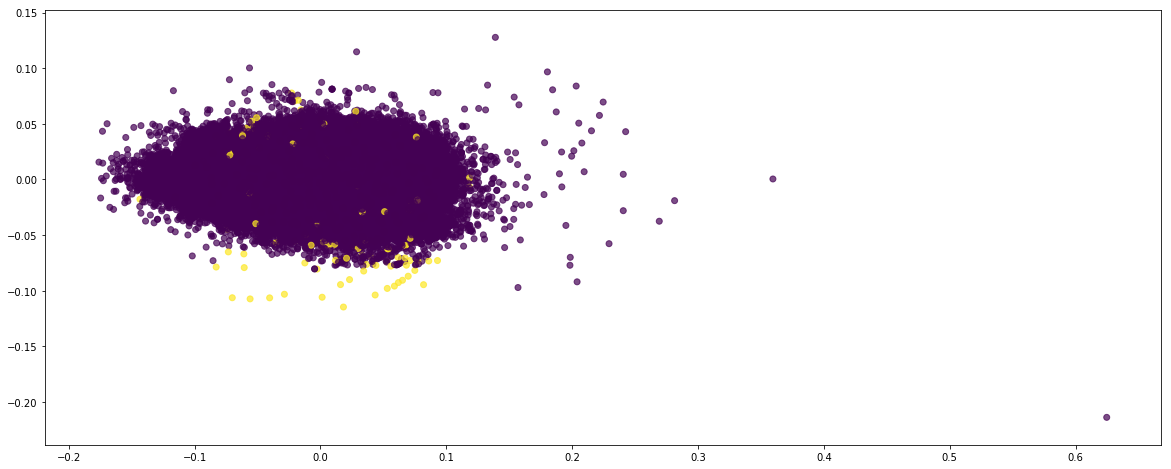

In [25]:
plt.figure(figsize=(20,8))
plt.scatter(output_2d[:,0],output_2d[:,1],c=train_set['Class'],alpha=0.7)#class variable response

### Since all predictors are numerical
#### We will need to pass our feature columns to our canned estimator when instantiating it

In [86]:
nV01 = tf.feature_column.numeric_column('V1')
nV02 = tf.feature_column.numeric_column('V2')
nV03 = tf.feature_column.numeric_column('V3')
nV04 = tf.feature_column.numeric_column('V4')
nV05 = tf.feature_column.numeric_column('V5')
nV06 = tf.feature_column.numeric_column('V6')
nV07 = tf.feature_column.numeric_column('V7')
nV08 = tf.feature_column.numeric_column('V8')
nV09 = tf.feature_column.numeric_column('V9')
nV10 = tf.feature_column.numeric_column('V10')
nV11 = tf.feature_column.numeric_column('V11')
nV12 = tf.feature_column.numeric_column('V12')
nV13 = tf.feature_column.numeric_column('V13')
nV14 = tf.feature_column.numeric_column('V14')
nV15 = tf.feature_column.numeric_column('V15')
nV16 = tf.feature_column.numeric_column('V16')
nV17 = tf.feature_column.numeric_column('V17')
nV18 = tf.feature_column.numeric_column('V18')
nV19 = tf.feature_column.numeric_column('V19')
nV20 = tf.feature_column.numeric_column('V20')
nV21 = tf.feature_column.numeric_column('V21')
nV22 = tf.feature_column.numeric_column('V22')
nV23 = tf.feature_column.numeric_column('V23')
nV24 = tf.feature_column.numeric_column('V24')
nV25 = tf.feature_column.numeric_column('V25')
nV26 = tf.feature_column.numeric_column('V26')
nV27 = tf.feature_column.numeric_column('V27')
nV28 = tf.feature_column.numeric_column('V28')
nV30 = tf.feature_column.numeric_column('Amount')

In [87]:
features = [nV01 , nV02 , nV03 , nV04 , nV05 , nV06 , nV07 , nV08 , nV09 , nV10 , 
             nV11 , nV12 ,
            nV13 , 
            nV14 ,
            nV15 , 
            nV16 , nV17 , nV18 , nV19 , 
            nV20 , 
             nV21 , nV22 , nV23 , 
            nV24 , nV25 , nV26 , 
             nV27 , nV28 , nV30] #numeric predictors

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.75, random_state=101)#75% training

C:\Users\Minerva\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [94]:
x_column_name = 'x'
example_id_column_name = 'example_id'

In [95]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={x_column_name: X, example_id_column_name: example_id},
    y=Y,
    num_epochs=None,
    shuffle=True)

### Build the binary classification model

In [12]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=100, num_epochs=1000,shuffle=True)
 
model = tf.estimator.LinearClassifier(feature_columns=features,n_classes=2)#linear classifier model
 
model.train(input_fn=input_func,steps=1000)
 
#test on training data
results=model.evaluate(tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10, num_epochs=1, shuffle=False))


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Minerva\\AppData\\Local\\Temp\\tmpokt2f6qj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000044BEFBF470>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Minerva

In [33]:
print(results)

{'accuracy': 0.9982819, 'accuracy_baseline': 0.9982819, 'auc': 0.6620843, 'auc_precision_recall': 0.6001718, 'average_loss': 0.011234111, 'label/mean': 0.0017181246, 'loss': 0.11233848, 'precision': 0.0, 'prediction/mean': 0.001781747, 'recall': 0.0, 'global_step': 1000}


### Evaluate on test data

In [13]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10, num_epochs=1, shuffle=False)
results=model.evaluate(eval_input_func)
print(results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-25-09:18:52
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Minerva\AppData\Local\Temp\tmpokt2f6qj\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-25-09:19:52
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.9982444, accuracy_baseline = 0.9982444, auc = 0.62795955, auc_precision_recall = 0.5528636, average_loss = 0.011537045, global_step = 1000, label/mean = 0.0017555687, loss = 0.11535749, precision = 0.0, prediction/mean = 0.001556452, recall = 0.0
{'accuracy': 0.9982444, 'accuracy_baseline': 0.9982444, 'auc': 0.62795955, 'auc_precision_recall': 0.5528636, 'average_loss': 0.011537045, 'label/mean': 0.0017555687, 'loss': 0.11535749, 'precision': 0.0, 'prediction/mean': 0.001556452, 'recall': 0.0, 'global_step': 1000}


## Random Forest (Binary Classification)

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

In [16]:
import numpy as np

In [2]:
df = pd.read_csv("titanic.csv")
df.head(n=7)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S

### Drop column

In [3]:
#dropping columns
train_df = df.drop(["PassengerId","Name","Ticket"], axis=1)

In [4]:
train_df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500   NaN        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250   NaN        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500   NaN        S

### How many null values?


In [5]:
print ("Train")
print (train_df.isnull().sum() )

Train
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


### Fill in NAs
#### Replace NAs with mean values

In [6]:
##identify mean ages
male_mean_age = train_df[train_df["Sex"]=="male"]["Age"].mean()
female_mean_age = train_df[train_df["Sex"]=="female"]["Age"].mean()
print ("female mean age: %1.0f" %female_mean_age )
print ("male mean age: %1.0f" %male_mean_age )

female mean age: 28
male mean age: 31


In [7]:
# fill the nan values 
train_df.loc[ (train_df["Sex"]=="male") & (train_df["Age"].isnull()), "Age"] = male_mean_age
train_df.loc[ (train_df["Sex"]=="female") & (train_df["Age"].isnull()), "Age"] = female_mean_age

In [8]:
### same for fare

mean_fare = train_df["Fare"].mean()


#### Replace NAs of Cabin and Embarked with X and S

In [9]:
train_df["Cabin"] = train_df["Cabin"].fillna("X")
train_df["Embarked"] = train_df["Embarked"].fillna("S")

In [10]:
train_df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500     X        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250     X        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500     X        S

In [11]:
# sampling 75% for train data
train_set = train_df.sample(frac=0.75, replace=False, random_state=123)

In [12]:
test_set = train_df.loc[ set(train_df.index) - set(train_set.index)] #25% testing

### Tensorflow Instantiation of Feature Columns

#### numeric_column: It defines that the feature will be a float32 number. 
#### bucketized_column: It defines a feature that will be bucketized. You can define the range of the buckets.
#### categorical_column_with_vocabulary_list: As the name says, it basically does a one-hot-encoding for the column using a vocabulary list.
#### categorical_column_with_hash_bucket: Similarly, this definition encodes the categorical values using a hash bucket. You define the number of hashes it will have

In [13]:
train_df.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
0         0       3    male  22.0      1      0   7.2500     X        S
1         1       1  female  38.0      1      0  71.2833   C85        C
2         1       3  female  26.0      0      0   7.9250     X        S
3         1       1  female  35.0      1      0  53.1000  C123        S
4         0       3    male  35.0      0      0   8.0500     X        S

#### Tensor Forest implementation only accepts int32 and float32 inputs

In [14]:
def prepare_datasets(df):
    df_copy = df[['Pclass', 'Parch',  'Sex', 'Embarked', "Age"]].copy()
    df_copy.loc[:,"Sex"] = df_copy.Sex.apply(lambda x: 0 if x =="male" else 1)#encode sex as 0 or 1

    e_map = {"C": 0,"Q":1, "S":2}
    df_copy.loc[:,"Embarked"] = df_copy.Embarked.apply(lambda x: e_map[x])

    df_copy.loc[:,"Age"]= df_copy.Age.astype(np.float32)#float 32

    x = df_copy[['Pclass', 'Parch', 'Age']].astype(np.float32)
#     y = train_set.Survived.astype(np.int32)
    y = df.Survived.astype(np.bool) ##since y is 0 or 1
    return x, y



In [17]:
x_train, y_train = prepare_datasets(train_set)

In [18]:
x_test, y_test = prepare_datasets(test_set)

### standard pandas_input_fn only reuturns 1 dimensional inputs.
### data needs to 2 dimensions

In [106]:
def generate_tf_input_fn(x_input,y_input,num_epochs=None):
    #this is the function we are generating
    def _input_fn_():
        # generate a standard input function
        train_input_fn = tf.estimator.inputs.pandas_input_fn(
            x= x_input,  
            y= y_input,
            num_epochs=num_epochs,
            shuffle=True,
            target_column='target',
        )
        #execute the standard input function 
        x, y = train_input_fn()
        # expand the shape of the results (necessary for Tensor Forest)
        for name in x:
            x[name] = tf.expand_dims(x[name], 1, name= name) 
        return x, y
    
    return _input_fn_

In [107]:
# generate custom train input function
forest_train_input_fn = generate_tf_input_fn(x_train,y_train,num_epochs=None)

In [108]:
# instantiate the estimator
params = tf.contrib.tensor_forest.python.tensor_forest.ForestHParams(
    num_classes=2, num_features=4, regression=False,
    num_trees=50, max_nodes=1000).fill()

In [109]:
classifier2 = tf.contrib.tensor_forest.client.random_forest.TensorForestEstimator(params)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000081D7F28240>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\Minerva\\AppData\\Local\\Temp\\tmpo35jc3_b'}


In [110]:
# train the estimator
classifier2.fit(input_fn=forest_train_input_fn)

INFO:tensorflow:Constructing forest with params = 
INFO:tensorflow:{'num_trees': 50, 'max_nodes': 1000, 'bagging_fraction': 1.0, 'feature_bagging_fraction': 1.0, 'num_splits_to_consider': 10, 'max_fertile_nodes': 0, 'split_after_samples': 250, 'valid_leaf_threshold': 1, 'dominate_method': 'bootstrap', 'dominate_fraction': 0.99, 'model_name': 'all_dense', 'split_finish_name': 'basic', 'split_pruning_name': 'none', 'collate_examples': False, 'checkpoint_stats': False, 'use_running_stats_method': False, 'initialize_average_splits': False, 'inference_tree_paths': False, 'param_file': None, 'split_name': 'less_or_equal', 'early_finish_check_every_samples': 0, 'prune_every_samples': 0, 'num_classes': 2, 'num_features': 4, 'regression': False, 'bagged_num_features': 4, 'bagged_features': None, 'num_outputs': 1, 'num_output_columns': 3, 'base_random_seed': 0, 'leaf_model_type': 0, 'stats_model_type': 0, 'finish_type': 0, 'pruning_type': 0, 'split_type': 0}
INFO:tensorflow:dense_features_size: 

TensorForestEstimator(params=None)

In [113]:
# evaluate and print the accuracy using the cross-validation input function
forest_cv_input_fn = generate_tf_input_fn(x_test, y_test, num_epochs=1)



In [114]:
accuracy_score = classifier2.evaluate(input_fn=forest_cv_input_fn)["accuracy"]
print("\nTest Accuracy: {0:f}\n".format(accuracy_score))

INFO:tensorflow:Constructing forest with params = 
INFO:tensorflow:{'num_trees': 50, 'max_nodes': 1000, 'bagging_fraction': 1.0, 'feature_bagging_fraction': 1.0, 'num_splits_to_consider': 10, 'max_fertile_nodes': 0, 'split_after_samples': 250, 'valid_leaf_threshold': 1, 'dominate_method': 'bootstrap', 'dominate_fraction': 0.99, 'model_name': 'all_dense', 'split_finish_name': 'basic', 'split_pruning_name': 'none', 'collate_examples': False, 'checkpoint_stats': False, 'use_running_stats_method': False, 'initialize_average_splits': False, 'inference_tree_paths': False, 'param_file': None, 'split_name': 'less_or_equal', 'early_finish_check_every_samples': 0, 'prune_every_samples': 0, 'num_classes': 2, 'num_features': 4, 'regression': False, 'bagged_num_features': 4, 'bagged_features': None, 'num_outputs': 1, 'num_output_columns': 3, 'base_random_seed': 0, 'leaf_model_type': 0, 'stats_model_type': 0, 'finish_type': 0, 'pruning_type': 0, 'split_type': 0, 'params_proto': pruning_type {
  prun

In [ ]:
##https://www.kaggle.com/pranjalrajput/by-tensorflow

In [14]:
# defining numeric columns
pclass_feature = tf.feature_column.numeric_column('Pclass')
parch_feature = tf.feature_column.numeric_column('Parch')
fare_feature = tf.feature_column.numeric_column('Fare')
age_feature = tf.feature_column.numeric_column('Age')

#defining buckets for children, teens, adults and elders.
age_bucket_feature = tf.feature_column.bucketized_column(age_feature,[12,21,60])

#defining a categorical column with predefined values
sex_feature = tf.feature_column.categorical_column_with_vocabulary_list(
    'Sex',['female','male']
)
#defining a categorical columns with dynamic values
embarked_feature =  tf.feature_column.categorical_column_with_hash_bucket(
    'Embarked', 3 
)
cabin_feature =  tf.feature_column.categorical_column_with_hash_bucket(
    'Cabin', 100 
)

feature_columns = [ pclass_feature,age_feature, age_bucket_feature, parch_feature, 
                   fare_feature, embarked_feature, cabin_feature ]

### Linear Classifier Estimator

In [15]:
estimator = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Minerva\\AppData\\Local\\Temp\\tmp6rsd9w8l', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000081D03D6588>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [18]:
# train input function
train_input_fn = tf.estimator.inputs.pandas_input_fn(
      x=X_train,
      y=y_train,
      num_epochs=None, #For training it can use how many epochs is necessary
      shuffle=True,
      target_column='target',
)


In [19]:
estimator.train(input_fn=train_input_fn, steps=450)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Minerva\AppData\Local\Temp\tmp6rsd9w8l\model.ckpt-450
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 451 into C:\Users\Minerva\AppData\Local\Temp\tmp6rsd9w8l\model.ckpt.
INFO:tensorflow:loss = 69.39996, step = 451
INFO:tensorflow:global_step/sec: 138.221
INFO:tensorflow:loss = 70.00403, step = 551 (0.727 sec)
INFO:tensorflow:global_step/sec: 232.405
INFO:tensorflow:loss = 60.431194, step = 651 (0.431 sec)
INFO:tensorflow:global_step/sec: 208.194
INFO:tensorflow:loss = 61.807503, step = 751 (0.478 sec)
INFO:tensorflow:global_step/sec: 229.207
INFO:tensorflow:loss = 72.180275, step = 851 (0.438 sec)
INFO:tensorflow:Saving checkpoints for 900 into C:\Users\Minerva\AppData\Local\Temp\tmp6rsd9w8l\model.ckpt.
INFO:te

In [21]:
#test on training data
results=estimator.evaluate(tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10, num_epochs=1, shuffle=False))


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-26-18:24:29
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Minerva\AppData\Local\Temp\tmp6rsd9w8l\model.ckpt-900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-26-18:24:30
INFO:tensorflow:Saving dict for global step 900: accuracy = 0.755988, accuracy_baseline = 0.6317365, auc = 0.7913969, auc_precision_recall = 0.7400725, average_loss = 0.50971174, global_step = 900, label/mean = 0.36826348, loss = 5.0819025, precision = 0.79856116, prediction/mean = 0.36875105, recall = 0.4512195


In [23]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10, num_epochs=1, shuffle=False)
results=estimator.evaluate(eval_input_func)
print(results)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-26-18:27:08
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Minerva\AppData\Local\Temp\tmp6rsd9w8l\model.ckpt-900
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-26-18:27:09
INFO:tensorflow:Saving dict for global step 900: accuracy = 0.71300447, accuracy_baseline = 0.56950676, auc = 0.7755085, auc_precision_recall = 0.74898183, average_loss = 0.57235044, global_step = 900, label/mean = 0.43049327, loss = 5.5493107, precision = 0.7962963, prediction/mean = 0.37973222, recall = 0.44791666
{'accuracy': 0.71300447, 'accuracy_baseline': 0.56950676, 'auc': 0.7755085, 'auc_precision_recall': 0.74898183, 'average_loss': 0.57235044, 'label/mean': 0.43049327, 'loss': 5.5493107, 'precision': 0.7962963, 'prediction/mean': 0.37973222, 'recall': 0.44791666, 'glo

## Random Forests
### Multiclass

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

In [101]:
from tensorflow.contrib.tensor_forest.python import tensor_forest
from tensorflow.python.ops import resources

In [53]:

df = pd.read_csv("glassClass.csv")
df.head()


RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

In [30]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [54]:
y = df.Type#response (with 7 categories)

x = df.drop(['Type','Al'],axis=1)#predictors

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=101)#70% training


C:\Users\Minerva\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [69]:
# Parameters
num_steps = 100 # Total steps to train
num_classes = 7 
num_features = 9 
num_trees = 50 
max_nodes = 1000 

In [70]:
# Input and Target placeholders 
X = tf.placeholder(tf.float32, shape=[None, num_features])
Y = tf.placeholder(tf.int64, shape=[None])

In [73]:
# Random Forest Parameters
hparams = tensor_forest.ForestHParams(num_classes=num_classes, num_features=num_features, num_trees=num_trees, max_nodes=max_nodes).fill()


In [74]:
# Build the Random Forest
forest_graph = tensor_forest.RandomForestGraphs(hparams)


INFO:tensorflow:Constructing forest with params = 
INFO:tensorflow:{'num_trees': 50, 'max_nodes': 1000, 'bagging_fraction': 1.0, 'feature_bagging_fraction': 1.0, 'num_splits_to_consider': 10, 'max_fertile_nodes': 0, 'split_after_samples': 250, 'valid_leaf_threshold': 1, 'dominate_method': 'bootstrap', 'dominate_fraction': 0.99, 'model_name': 'all_dense', 'split_finish_name': 'basic', 'split_pruning_name': 'none', 'collate_examples': False, 'checkpoint_stats': False, 'use_running_stats_method': False, 'initialize_average_splits': False, 'inference_tree_paths': False, 'param_file': None, 'split_name': 'less_or_equal', 'early_finish_check_every_samples': 0, 'prune_every_samples': 0, 'num_classes': 7, 'num_features': 9, 'bagged_num_features': 9, 'bagged_features': None, 'regression': False, 'num_outputs': 1, 'num_output_columns': 8, 'base_random_seed': 0, 'leaf_model_type': 0, 'stats_model_type': 0, 'finish_type': 0, 'pruning_type': 0, 'split_type': 0}


In [75]:
# Get training graph and loss
train_op = forest_graph.training_graph(X, Y)
loss_op = forest_graph.training_loss(X, Y)

In [76]:
# Measure the accuracy
infer_op, _, _ = forest_graph.inference_graph(X)
correct_prediction = tf.equal(tf.argmax(infer_op, 1), tf.cast(Y, tf.int64))
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [77]:
# Initialize the variables (i.e. assign their default value) and forest resources
init_vars = tf.group(tf.global_variables_initializer(), resources.initialize_resources(resources.shared_resources()))
    

In [78]:
# Start TensorFlow session
sess = tf.Session()


In [79]:
# Run the initializer
sess.run(init_vars)

In [81]:
# Training
for i in range(1, num_steps + 1):
    _, l = sess.run([train_op, loss_op], feed_dict={X: x, Y: y})
    if i % 50 == 0 or i == 1:
        acc = sess.run(accuracy_op, feed_dict={X: X_train, Y: y_train})
        print('Step %i, Loss: %f, Acc: %f' % (i, l, acc))

ValueError: Cannot feed value of shape (214, 8) for Tensor 'Placeholder:0', which has shape '(?, 9)'

In [68]:
from tensorflow.examples.tutorials.mnist import input_data

### Tensorflow Estimators

In [56]:
RI = tf.feature_column.numeric_column('RI')
Na = tf.feature_column.numeric_column('Na')
Mg = tf.feature_column.numeric_column('Mg')
Si = tf.feature_column.numeric_column('Si')
K = tf.feature_column.numeric_column('K')
Ca = tf.feature_column.numeric_column('Ca')
Ba = tf.feature_column.numeric_column('Ba')
Fe = tf.feature_column.numeric_column('Fe')

In [57]:
fcolumns = [RI,Na,Mg,Si,K,Ca,Ba,Fe]

### Linear Classifier

In [58]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=100, num_epochs=1000,shuffle=True)
 


In [59]:
model = tf.estimator.LinearClassifier(feature_columns=fcolumns,n_classes=7)#linear classifier model (for 7 classes)
 


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Minerva\\AppData\\Local\\Temp\\tmpwmxgcmkh', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000081D14015C0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Autoencoder for Multi-class Classification

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
##One-hot encoding means writing categorical variables in a one-hot vector format, 
##where the vector is all-zero apart from one element

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

In [18]:
print(mnist)

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000000474D029AC8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000004749D1D9B0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000004749D1D6A0>)


In [3]:
# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

In [4]:
# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 128 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)
# Each image is 28x28 pixels

In [5]:
# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}


In [6]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


In [7]:
# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

In [8]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)


In [9]:
# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X


In [10]:
# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)


### Train autoencoder

In [15]:
sess = tf.Session()

# Run the initializer
sess.run(init)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))

Step 1: Minibatch Loss: 0.428111
Step 1000: Minibatch Loss: 0.132423
Step 2000: Minibatch Loss: 0.113047
Step 3000: Minibatch Loss: 0.104143
Step 4000: Minibatch Loss: 0.096695
Step 5000: Minibatch Loss: 0.093053
Step 6000: Minibatch Loss: 0.091386
Step 7000: Minibatch Loss: 0.086655
Step 8000: Minibatch Loss: 0.083178
Step 9000: Minibatch Loss: 0.082644
Step 10000: Minibatch Loss: 0.081431
Step 11000: Minibatch Loss: 0.077057
Step 12000: Minibatch Loss: 0.075471
Step 13000: Minibatch Loss: 0.074014
Step 14000: Minibatch Loss: 0.072571
Step 15000: Minibatch Loss: 0.069003
Step 16000: Minibatch Loss: 0.066665
Step 17000: Minibatch Loss: 0.065427
Step 18000: Minibatch Loss: 0.065889
Step 19000: Minibatch Loss: 0.062789
Step 20000: Minibatch Loss: 0.062632
Step 21000: Minibatch Loss: 0.063246
Step 22000: Minibatch Loss: 0.063164
Step 23000: Minibatch Loss: 0.061599
Step 24000: Minibatch Loss: 0.062184
Step 25000: Minibatch Loss: 0.060488
Step 26000: Minibatch Loss: 0.056481
Step 27000: Mi

Original Images


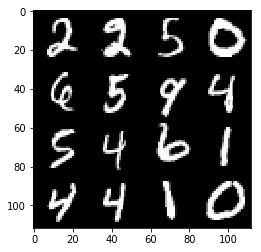

Reconstructed Images


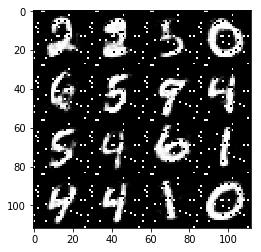

In [16]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()